Thermal Expansion for BB84 Z gate for 0 - 3rd November 2021

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
backend.properties()

In [2]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(p_m,p_g):

    T1 = 142370 # in nano second, basically 54 micro second
    T2 = 209610 # in nano second, basically 44 micro second

    # Gate operation time in nano second
    time_h = 71.11
    time_x = 71.11
    time_id = 71.11
    time_measure = 4977.778

    # probability of bit flip error after each gate

    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    error_m = pauli_error([('X',p_m),('I',1-p_m)])
    
    error_gate1 = thermal_relaxation_error(T1,T2,time_x)
    error_bit1 = depolarizing_error(p_g,1)
    error_bit2 = error_bit1.tensor(error_bit1)

    noise_model = noise.NoiseModel()

    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    noise_model.add_all_qubit_quantum_error(error_m, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, "relaxation single gate")
    noise_model.add_all_qubit_quantum_error(error_bit1, ["h","x","id"])
    
    return noise_model

In [3]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random
y_list=[]
#data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(20):
    data=100
    ##########################################################################
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=100
    for i in range(n):
        m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            for j in range(m):
                qc.id(0)
                qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=8192,noise_model=make_noise_therm(0.034,0.0003521)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
            itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            for key, value in counts.items():
                if value == itemMaxValue[1]:
                    bob_bits.append(value/8192)
    y_list.append(bob_bits)
    print(bob_bits)
    print("")
print(y_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




[0.962646484375, 0.96142578125, 0.962158203125, 0.95947265625, 0.9583740234375, 0.9539794921875, 0.952392578125, 0.9549560546875, 0.948974609375, 0.9534912109375, 0.9481201171875, 0.9490966796875, 0.94482421875, 0.9442138671875, 0.943603515625, 0.94091796875, 0.934326171875, 0.9384765625, 0.9384765625, 0.9346923828125, 0.9324951171875, 0.9276123046875, 0.9305419921875, 0.930419921875, 0.925537109375, 0.92333984375, 0.927001953125, 0.92236328125, 0.9232177734375, 0.923095703125, 0.9215087890625, 0.9193115234375, 0.9273681640625, 0.9132080078125, 0.91064453125, 0.91552734375, 0.913818359375, 0.9056396484375, 0.9083251953125, 0.908203125, 0.8997802734375, 0.905517578125, 0.8997802734375, 0.8983154296875, 0.902099609375, 0.9012451171875, 0.899658203125, 0.8912353515625, 0.8956298828125, 0.8890380859375, 0.8878173828125, 0.8905029296875, 0.8846435546875, 0.8841552734375, 0.8878173828125, 0.8828125, 0.8826904296875, 0.8779296875, 0.8785400390625, 0.8837890625, 0.879638671875, 0.872314453125,

[0.9642333984375, 0.96484375, 0.9599609375, 0.9617919921875, 0.9542236328125, 0.959716796875, 0.953857421875, 0.95361328125, 0.9512939453125, 0.9530029296875, 0.946044921875, 0.9454345703125, 0.940185546875, 0.9417724609375, 0.941650390625, 0.9407958984375, 0.9412841796875, 0.9368896484375, 0.9395751953125, 0.9339599609375, 0.9326171875, 0.9290771484375, 0.9329833984375, 0.9320068359375, 0.9241943359375, 0.9249267578125, 0.92529296875, 0.922119140625, 0.921142578125, 0.91796875, 0.9190673828125, 0.9161376953125, 0.91162109375, 0.9161376953125, 0.9136962890625, 0.914306640625, 0.907958984375, 0.9051513671875, 0.906005859375, 0.9007568359375, 0.9105224609375, 0.90625, 0.903076171875, 0.8985595703125, 0.9052734375, 0.9034423828125, 0.8985595703125, 0.8961181640625, 0.888916015625, 0.8929443359375, 0.890625, 0.900146484375, 0.8858642578125, 0.8834228515625, 0.8837890625, 0.8880615234375, 0.8841552734375, 0.8836669921875, 0.88134765625, 0.882080078125, 0.880126953125, 0.872802734375, 0.8709

[0.966064453125, 0.9617919921875, 0.9603271484375, 0.9609375, 0.9593505859375, 0.955078125, 0.9576416015625, 0.954833984375, 0.9493408203125, 0.947998046875, 0.948486328125, 0.9515380859375, 0.94482421875, 0.9471435546875, 0.9395751953125, 0.9407958984375, 0.939453125, 0.941162109375, 0.9375, 0.9320068359375, 0.9320068359375, 0.9385986328125, 0.9339599609375, 0.9298095703125, 0.9327392578125, 0.92578125, 0.9281005859375, 0.9215087890625, 0.927001953125, 0.920166015625, 0.9261474609375, 0.922119140625, 0.914794921875, 0.919189453125, 0.916015625, 0.9127197265625, 0.91015625, 0.9114990234375, 0.9085693359375, 0.9072265625, 0.908935546875, 0.9068603515625, 0.9014892578125, 0.9039306640625, 0.8983154296875, 0.9046630859375, 0.90185546875, 0.8973388671875, 0.895263671875, 0.8927001953125, 0.8978271484375, 0.892578125, 0.8919677734375, 0.8887939453125, 0.8931884765625, 0.8822021484375, 0.8817138671875, 0.8836669921875, 0.8800048828125, 0.8795166015625, 0.884765625, 0.876708984375, 0.87573242

[0.962158203125, 0.9658203125, 0.962890625, 0.9615478515625, 0.96044921875, 0.958251953125, 0.9539794921875, 0.949462890625, 0.95654296875, 0.9549560546875, 0.9503173828125, 0.9505615234375, 0.943115234375, 0.9482421875, 0.942626953125, 0.9417724609375, 0.9415283203125, 0.94189453125, 0.93505859375, 0.9361572265625, 0.9334716796875, 0.93701171875, 0.9334716796875, 0.9317626953125, 0.9324951171875, 0.9234619140625, 0.9212646484375, 0.9197998046875, 0.9178466796875, 0.9190673828125, 0.92236328125, 0.920166015625, 0.91552734375, 0.914794921875, 0.91552734375, 0.9114990234375, 0.9156494140625, 0.9127197265625, 0.9105224609375, 0.9017333984375, 0.9022216796875, 0.90283203125, 0.9100341796875, 0.9014892578125, 0.8975830078125, 0.897705078125, 0.8990478515625, 0.8995361328125, 0.8927001953125, 0.89453125, 0.8946533203125, 0.896728515625, 0.893798828125, 0.88623046875, 0.8896484375, 0.88330078125, 0.8895263671875, 0.886962890625, 0.884033203125, 0.8795166015625, 0.8748779296875, 0.879150390625

[0.9638671875, 0.9647216796875, 0.96240234375, 0.9576416015625, 0.9598388671875, 0.955078125, 0.954833984375, 0.954833984375, 0.9478759765625, 0.943115234375, 0.9500732421875, 0.9461669921875, 0.945556640625, 0.942626953125, 0.9427490234375, 0.945068359375, 0.9425048828125, 0.93994140625, 0.94091796875, 0.933837890625, 0.9339599609375, 0.9302978515625, 0.9339599609375, 0.9296875, 0.927734375, 0.931396484375, 0.9254150390625, 0.922119140625, 0.91796875, 0.9205322265625, 0.91650390625, 0.9146728515625, 0.9193115234375, 0.913818359375, 0.911865234375, 0.9068603515625, 0.908935546875, 0.9014892578125, 0.9046630859375, 0.9052734375, 0.90625, 0.906494140625, 0.90283203125, 0.900634765625, 0.8995361328125, 0.9029541015625, 0.900146484375, 0.8951416015625, 0.90087890625, 0.890625, 0.8946533203125, 0.884765625, 0.8834228515625, 0.89013671875, 0.88037109375, 0.8843994140625, 0.888427734375, 0.883544921875, 0.88671875, 0.879638671875, 0.879150390625, 0.872802734375, 0.8721923828125, 0.87658691406

[0.9664306640625, 0.965087890625, 0.9613037109375, 0.96240234375, 0.9598388671875, 0.9560546875, 0.955810546875, 0.95458984375, 0.95458984375, 0.9442138671875, 0.9515380859375, 0.946044921875, 0.943359375, 0.94287109375, 0.9364013671875, 0.9398193359375, 0.9390869140625, 0.9356689453125, 0.9375, 0.9361572265625, 0.9307861328125, 0.93017578125, 0.9312744140625, 0.9296875, 0.9273681640625, 0.9239501953125, 0.921142578125, 0.9278564453125, 0.92041015625, 0.923583984375, 0.9173583984375, 0.91552734375, 0.9107666015625, 0.9149169921875, 0.91162109375, 0.9149169921875, 0.9091796875, 0.9144287109375, 0.9044189453125, 0.90966796875, 0.90087890625, 0.90380859375, 0.904296875, 0.90234375, 0.902587890625, 0.89599609375, 0.894287109375, 0.89453125, 0.8951416015625, 0.890869140625, 0.8907470703125, 0.892578125, 0.888427734375, 0.8895263671875, 0.8883056640625, 0.884765625, 0.885986328125, 0.8839111328125, 0.87841796875, 0.884765625, 0.872314453125, 0.8759765625, 0.87255859375, 0.875244140625, 0.873

[0.9622802734375, 0.961181640625, 0.962158203125, 0.95556640625, 0.96044921875, 0.9588623046875, 0.9547119140625, 0.9537353515625, 0.9547119140625, 0.947509765625, 0.9510498046875, 0.9481201171875, 0.9488525390625, 0.9443359375, 0.938720703125, 0.938720703125, 0.93798828125, 0.9388427734375, 0.9410400390625, 0.9404296875, 0.9342041015625, 0.93359375, 0.9259033203125, 0.9288330078125, 0.9267578125, 0.9266357421875, 0.92724609375, 0.9212646484375, 0.9227294921875, 0.923095703125, 0.9210205078125, 0.9173583984375, 0.916015625, 0.916748046875, 0.91259765625, 0.9171142578125, 0.91162109375, 0.9111328125, 0.908203125, 0.907470703125, 0.9029541015625, 0.9024658203125, 0.9073486328125, 0.8990478515625, 0.897705078125, 0.9002685546875, 0.9029541015625, 0.8948974609375, 0.892578125, 0.8955078125, 0.88720703125, 0.891845703125, 0.89111328125, 0.8917236328125, 0.887939453125, 0.8890380859375, 0.8822021484375, 0.88134765625, 0.885498046875, 0.8834228515625, 0.8818359375, 0.8753662109375, 0.88317871

[0.9642333984375, 0.9635009765625, 0.9625244140625, 0.9588623046875, 0.958984375, 0.9552001953125, 0.956787109375, 0.950927734375, 0.948486328125, 0.9517822265625, 0.9501953125, 0.94580078125, 0.9443359375, 0.9459228515625, 0.93994140625, 0.9439697265625, 0.9442138671875, 0.9381103515625, 0.939697265625, 0.934814453125, 0.93212890625, 0.9317626953125, 0.92724609375, 0.926513671875, 0.925537109375, 0.922607421875, 0.918701171875, 0.926513671875, 0.919921875, 0.9139404296875, 0.9188232421875, 0.9161376953125, 0.9111328125, 0.915771484375, 0.9180908203125, 0.9132080078125, 0.9075927734375, 0.9150390625, 0.905029296875, 0.908935546875, 0.90380859375, 0.909912109375, 0.897216796875, 0.905517578125, 0.9068603515625, 0.8984375, 0.8988037109375, 0.899169921875, 0.8924560546875, 0.89208984375, 0.8922119140625, 0.885986328125, 0.8922119140625, 0.8839111328125, 0.883544921875, 0.8828125, 0.88720703125, 0.8836669921875, 0.883056640625, 0.8778076171875, 0.87646484375, 0.8760986328125, 0.88464355468

[0.9632568359375, 0.963134765625, 0.96337890625, 0.9581298828125, 0.9564208984375, 0.9598388671875, 0.9552001953125, 0.951416015625, 0.955810546875, 0.9490966796875, 0.9483642578125, 0.9483642578125, 0.946044921875, 0.944580078125, 0.9420166015625, 0.9422607421875, 0.9422607421875, 0.9375, 0.9356689453125, 0.935791015625, 0.9356689453125, 0.93896484375, 0.9290771484375, 0.9290771484375, 0.92578125, 0.9259033203125, 0.9251708984375, 0.9178466796875, 0.9212646484375, 0.9207763671875, 0.9178466796875, 0.915283203125, 0.9180908203125, 0.9085693359375, 0.9149169921875, 0.913330078125, 0.9063720703125, 0.9156494140625, 0.912109375, 0.91064453125, 0.904541015625, 0.901611328125, 0.900146484375, 0.9000244140625, 0.9022216796875, 0.898193359375, 0.8912353515625, 0.8994140625, 0.9010009765625, 0.8941650390625, 0.891357421875, 0.8919677734375, 0.8912353515625, 0.892822265625, 0.89111328125, 0.88525390625, 0.8851318359375, 0.878173828125, 0.87841796875, 0.88232421875, 0.8822021484375, 0.8823242187

[0.962646484375, 0.9588623046875, 0.9615478515625, 0.9625244140625, 0.95654296875, 0.957763671875, 0.9541015625, 0.954833984375, 0.9559326171875, 0.9520263671875, 0.9443359375, 0.9434814453125, 0.9432373046875, 0.946044921875, 0.9459228515625, 0.9415283203125, 0.9405517578125, 0.938720703125, 0.935302734375, 0.93310546875, 0.9349365234375, 0.9329833984375, 0.933349609375, 0.9287109375, 0.930908203125, 0.923828125, 0.93017578125, 0.9189453125, 0.927978515625, 0.924072265625, 0.919677734375, 0.9224853515625, 0.9178466796875, 0.915283203125, 0.9112548828125, 0.90576171875, 0.9124755859375, 0.909912109375, 0.91162109375, 0.9136962890625, 0.90625, 0.9013671875, 0.90185546875, 0.903564453125, 0.902587890625, 0.8983154296875, 0.9022216796875, 0.897705078125, 0.897216796875, 0.895751953125, 0.8931884765625, 0.887451171875, 0.8980712890625, 0.894287109375, 0.881591796875, 0.8875732421875, 0.8890380859375, 0.88720703125, 0.88525390625, 0.8812255859375, 0.8746337890625, 0.8724365234375, 0.8792724

[0.965087890625, 0.958984375, 0.9635009765625, 0.9617919921875, 0.9598388671875, 0.95947265625, 0.9512939453125, 0.950927734375, 0.9500732421875, 0.9490966796875, 0.949462890625, 0.9447021484375, 0.94580078125, 0.94677734375, 0.9429931640625, 0.9373779296875, 0.9356689453125, 0.9354248046875, 0.9356689453125, 0.9395751953125, 0.938720703125, 0.931396484375, 0.935791015625, 0.9278564453125, 0.9266357421875, 0.9244384765625, 0.92626953125, 0.9296875, 0.9248046875, 0.921875, 0.917724609375, 0.91455078125, 0.9183349609375, 0.914306640625, 0.9141845703125, 0.9112548828125, 0.9093017578125, 0.90771484375, 0.905517578125, 0.9073486328125, 0.9102783203125, 0.8988037109375, 0.9083251953125, 0.9033203125, 0.898193359375, 0.897705078125, 0.8948974609375, 0.89599609375, 0.893310546875, 0.8861083984375, 0.8909912109375, 0.8902587890625, 0.8914794921875, 0.8890380859375, 0.8895263671875, 0.8887939453125, 0.88525390625, 0.881591796875, 0.880615234375, 0.876708984375, 0.8785400390625, 0.8756103515625,

[0.958740234375, 0.95947265625, 0.9599609375, 0.9608154296875, 0.959228515625, 0.95458984375, 0.95166015625, 0.9515380859375, 0.9525146484375, 0.953125, 0.948974609375, 0.9490966796875, 0.9468994140625, 0.9461669921875, 0.942138671875, 0.94189453125, 0.942626953125, 0.9405517578125, 0.9383544921875, 0.935791015625, 0.932861328125, 0.93115234375, 0.931396484375, 0.93017578125, 0.9283447265625, 0.930908203125, 0.9241943359375, 0.923095703125, 0.9227294921875, 0.9263916015625, 0.92333984375, 0.91943359375, 0.918212890625, 0.91552734375, 0.9136962890625, 0.907958984375, 0.9083251953125, 0.9130859375, 0.90380859375, 0.9066162109375, 0.91015625, 0.905029296875, 0.901611328125, 0.9012451171875, 0.9036865234375, 0.9034423828125, 0.89599609375, 0.89697265625, 0.898681640625, 0.8995361328125, 0.890380859375, 0.8958740234375, 0.88623046875, 0.8856201171875, 0.88525390625, 0.88525390625, 0.8800048828125, 0.886474609375, 0.883544921875, 0.884765625, 0.878173828125, 0.874267578125, 0.8720703125, 0.8

[0.96630859375, 0.9595947265625, 0.96630859375, 0.96240234375, 0.958740234375, 0.957763671875, 0.9556884765625, 0.9532470703125, 0.9556884765625, 0.9508056640625, 0.9508056640625, 0.9505615234375, 0.9481201171875, 0.946044921875, 0.9417724609375, 0.9437255859375, 0.9398193359375, 0.936767578125, 0.9398193359375, 0.9364013671875, 0.932373046875, 0.936279296875, 0.9315185546875, 0.92626953125, 0.930419921875, 0.9193115234375, 0.924072265625, 0.923583984375, 0.916748046875, 0.91845703125, 0.918212890625, 0.916259765625, 0.91748046875, 0.921142578125, 0.913818359375, 0.9127197265625, 0.9066162109375, 0.9095458984375, 0.9090576171875, 0.9073486328125, 0.905517578125, 0.90283203125, 0.9110107421875, 0.901123046875, 0.9029541015625, 0.9029541015625, 0.892578125, 0.89697265625, 0.8905029296875, 0.8978271484375, 0.8892822265625, 0.8892822265625, 0.8956298828125, 0.8912353515625, 0.888427734375, 0.8885498046875, 0.8800048828125, 0.8814697265625, 0.8839111328125, 0.87744140625, 0.875244140625, 0.

[0.9661865234375, 0.9654541015625, 0.95751953125, 0.957763671875, 0.9547119140625, 0.958984375, 0.95751953125, 0.9527587890625, 0.95263671875, 0.9481201171875, 0.947509765625, 0.948486328125, 0.9456787109375, 0.9462890625, 0.9415283203125, 0.940673828125, 0.94189453125, 0.939208984375, 0.9375, 0.9381103515625, 0.9342041015625, 0.935302734375, 0.9276123046875, 0.925537109375, 0.92529296875, 0.929931640625, 0.927734375, 0.92919921875, 0.9249267578125, 0.921630859375, 0.912841796875, 0.9212646484375, 0.9149169921875, 0.9156494140625, 0.90966796875, 0.9134521484375, 0.91943359375, 0.9124755859375, 0.906494140625, 0.9068603515625, 0.9090576171875, 0.8985595703125, 0.9068603515625, 0.900390625, 0.9002685546875, 0.9024658203125, 0.8988037109375, 0.892578125, 0.896240234375, 0.8966064453125, 0.8922119140625, 0.8892822265625, 0.8870849609375, 0.8897705078125, 0.8878173828125, 0.8839111328125, 0.8831787109375, 0.885498046875, 0.8856201171875, 0.878173828125, 0.882080078125, 0.882080078125, 0.881

[0.965576171875, 0.962890625, 0.9600830078125, 0.956298828125, 0.9615478515625, 0.9527587890625, 0.954833984375, 0.952880859375, 0.9500732421875, 0.9505615234375, 0.9461669921875, 0.94189453125, 0.9454345703125, 0.946533203125, 0.946533203125, 0.939697265625, 0.9405517578125, 0.93896484375, 0.938720703125, 0.9371337890625, 0.934814453125, 0.93212890625, 0.9312744140625, 0.9254150390625, 0.9281005859375, 0.9251708984375, 0.919677734375, 0.925048828125, 0.924560546875, 0.920166015625, 0.91943359375, 0.92236328125, 0.9171142578125, 0.916259765625, 0.91455078125, 0.9163818359375, 0.906982421875, 0.9140625, 0.910888671875, 0.900146484375, 0.8966064453125, 0.9056396484375, 0.90673828125, 0.903076171875, 0.90576171875, 0.8985595703125, 0.8984375, 0.896240234375, 0.8912353515625, 0.8970947265625, 0.886962890625, 0.887939453125, 0.884521484375, 0.886962890625, 0.8878173828125, 0.886962890625, 0.88330078125, 0.8843994140625, 0.88916015625, 0.8837890625, 0.873291015625, 0.8824462890625, 0.8758544

[0.9649658203125, 0.958740234375, 0.96142578125, 0.9591064453125, 0.9580078125, 0.9527587890625, 0.9569091796875, 0.954345703125, 0.95361328125, 0.9500732421875, 0.947998046875, 0.947509765625, 0.94287109375, 0.9423828125, 0.94482421875, 0.941162109375, 0.9390869140625, 0.9375, 0.9351806640625, 0.9320068359375, 0.9322509765625, 0.9329833984375, 0.9317626953125, 0.934814453125, 0.9261474609375, 0.9278564453125, 0.9222412109375, 0.9217529296875, 0.922607421875, 0.9229736328125, 0.9183349609375, 0.918212890625, 0.91552734375, 0.92041015625, 0.9180908203125, 0.918701171875, 0.916748046875, 0.910400390625, 0.904541015625, 0.907470703125, 0.9017333984375, 0.904541015625, 0.904052734375, 0.901123046875, 0.8978271484375, 0.9039306640625, 0.8978271484375, 0.8914794921875, 0.8934326171875, 0.888916015625, 0.89013671875, 0.8914794921875, 0.882568359375, 0.8870849609375, 0.8902587890625, 0.8919677734375, 0.8807373046875, 0.88330078125, 0.8768310546875, 0.880859375, 0.8787841796875, 0.8795166015625

[0.963134765625, 0.9652099609375, 0.9581298828125, 0.962890625, 0.9591064453125, 0.9554443359375, 0.957275390625, 0.9541015625, 0.9498291015625, 0.948486328125, 0.9459228515625, 0.94775390625, 0.94580078125, 0.945556640625, 0.9393310546875, 0.936279296875, 0.9393310546875, 0.9366455078125, 0.9373779296875, 0.9351806640625, 0.9320068359375, 0.93017578125, 0.9365234375, 0.9327392578125, 0.92578125, 0.927978515625, 0.9261474609375, 0.92626953125, 0.9222412109375, 0.9197998046875, 0.9210205078125, 0.91845703125, 0.9149169921875, 0.9168701171875, 0.9146728515625, 0.90869140625, 0.9129638671875, 0.9053955078125, 0.9102783203125, 0.9051513671875, 0.9129638671875, 0.903564453125, 0.89453125, 0.89990234375, 0.8941650390625, 0.8961181640625, 0.901611328125, 0.894775390625, 0.884033203125, 0.892822265625, 0.892578125, 0.8883056640625, 0.893310546875, 0.891845703125, 0.8843994140625, 0.8826904296875, 0.88525390625, 0.876220703125, 0.8826904296875, 0.881103515625, 0.8779296875, 0.884765625, 0.87890

[0.9658203125, 0.96533203125, 0.960205078125, 0.9588623046875, 0.958251953125, 0.9552001953125, 0.9547119140625, 0.954833984375, 0.9505615234375, 0.9525146484375, 0.9500732421875, 0.94482421875, 0.949951171875, 0.943359375, 0.94384765625, 0.9410400390625, 0.93701171875, 0.936767578125, 0.9390869140625, 0.933837890625, 0.928955078125, 0.9326171875, 0.932373046875, 0.928466796875, 0.9312744140625, 0.9276123046875, 0.9266357421875, 0.9268798828125, 0.9248046875, 0.91943359375, 0.92138671875, 0.9197998046875, 0.9149169921875, 0.91748046875, 0.9127197265625, 0.9124755859375, 0.9117431640625, 0.9041748046875, 0.90625, 0.9044189453125, 0.90576171875, 0.9107666015625, 0.9024658203125, 0.903076171875, 0.902587890625, 0.90283203125, 0.8936767578125, 0.8887939453125, 0.8916015625, 0.8914794921875, 0.8892822265625, 0.89404296875, 0.893798828125, 0.8875732421875, 0.8858642578125, 0.888916015625, 0.8824462890625, 0.87939453125, 0.8841552734375, 0.883056640625, 0.876708984375, 0.87646484375, 0.877685

[0.963134765625, 0.9609375, 0.96044921875, 0.9617919921875, 0.9581298828125, 0.953369140625, 0.9541015625, 0.9525146484375, 0.950439453125, 0.9476318359375, 0.948974609375, 0.9461669921875, 0.947509765625, 0.9423828125, 0.9404296875, 0.9417724609375, 0.93896484375, 0.9339599609375, 0.9373779296875, 0.9349365234375, 0.9322509765625, 0.9312744140625, 0.932373046875, 0.934326171875, 0.931640625, 0.92529296875, 0.92236328125, 0.9251708984375, 0.92529296875, 0.9176025390625, 0.9124755859375, 0.9207763671875, 0.9130859375, 0.9188232421875, 0.9173583984375, 0.9139404296875, 0.908203125, 0.9112548828125, 0.905029296875, 0.9049072265625, 0.905029296875, 0.90283203125, 0.906982421875, 0.906982421875, 0.89892578125, 0.8961181640625, 0.8966064453125, 0.893310546875, 0.887451171875, 0.8966064453125, 0.892578125, 0.8907470703125, 0.8914794921875, 0.889892578125, 0.887939453125, 0.882568359375, 0.888427734375, 0.8887939453125, 0.88134765625, 0.882080078125, 0.8759765625, 0.880126953125, 0.87426757812

[0.961181640625, 0.9613037109375, 0.9581298828125, 0.9613037109375, 0.9542236328125, 0.9588623046875, 0.9527587890625, 0.9521484375, 0.9525146484375, 0.9482421875, 0.9483642578125, 0.94970703125, 0.9454345703125, 0.947998046875, 0.9383544921875, 0.9381103515625, 0.9437255859375, 0.9404296875, 0.9385986328125, 0.9346923828125, 0.93408203125, 0.934814453125, 0.9315185546875, 0.928955078125, 0.925537109375, 0.927734375, 0.927001953125, 0.927001953125, 0.9259033203125, 0.9228515625, 0.915771484375, 0.9193115234375, 0.9127197265625, 0.9107666015625, 0.9111328125, 0.9163818359375, 0.9058837890625, 0.908203125, 0.905517578125, 0.90234375, 0.905029296875, 0.9090576171875, 0.8995361328125, 0.896484375, 0.8939208984375, 0.8978271484375, 0.9000244140625, 0.894287109375, 0.896484375, 0.8941650390625, 0.8829345703125, 0.8841552734375, 0.884765625, 0.8856201171875, 0.8851318359375, 0.888671875, 0.880126953125, 0.88671875, 0.88330078125, 0.8778076171875, 0.8765869140625, 0.883056640625, 0.87707519531

20 Times Average

In [4]:
from statistics import mean
y=y_list
print(*map(mean, zip(*y)))

0.963897705078125 0.96241455078125 0.96121826171875 0.96009521484375 0.95831298828125 0.956451416015625 0.954803466796875 0.953125 0.9520751953125 0.94979248046875 0.948638916015625 0.947265625 0.945391845703125 0.945062255859375 0.941748046875 0.940869140625 0.940093994140625 0.93817138671875 0.937921142578125 0.935430908203125 0.93323974609375 0.93291015625 0.931695556640625 0.92955322265625 0.927911376953125 0.9259033203125 0.92479248046875 0.9239013671875 0.922705078125 0.9208740234375 0.91904296875 0.9184814453125 0.915985107421875 0.91578369140625 0.91380615234375 0.912860107421875 0.910498046875 0.90994873046875 0.907342529296875 0.90631103515625 0.905413818359375 0.904437255859375 0.903509521484375 0.901507568359375 0.900653076171875 0.90015869140625 0.89796142578125 0.89532470703125 0.89373779296875 0.89346923828125 0.89088134765625 0.8907958984375 0.889581298828125 0.888482666015625 0.8869873046875 0.88592529296875 0.88424072265625 0.883197021484375 0.882623291015625 0.880993

Map Plotting

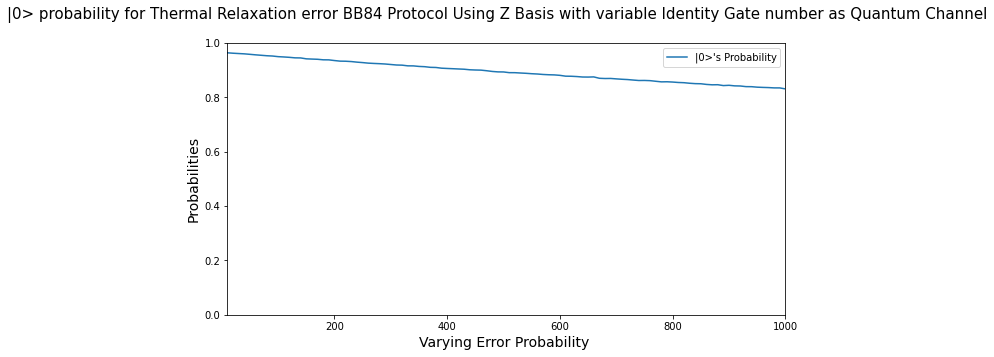

<Figure size 576x360 with 0 Axes>

In [6]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|0> probability for Thermal Relaxation error BB84 Protocol Using Z Basis with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.963897705078125, 0.96241455078125, 0.96121826171875, 0.96009521484375, 0.95831298828125, 0.956451416015625, 0.954803466796875, 0.953125, 0.9520751953125, 0.94979248046875, 0.948638916015625, 0.947265625, 0.945391845703125, 0.945062255859375, 0.941748046875, 0.940869140625, 0.940093994140625, 0.93817138671875, 0.937921142578125, 0.935430908203125, 0.93323974609375, 0.93291015625, 0.931695556640625, 0.92955322265625, 0.927911376953125, 0.9259033203125, 0.92479248046875, 0.9239013671875, 0.922705078125, 0.9208740234375, 0.91904296875, 0.9184814453125, 0.915985107421875, 0.91578369140625, 0.91380615234375, 0.912860107421875, 0.910498046875, 0.90994873046875, 0.907342529296875, 0.90631103515625, 0.905413818359375, 0.904437255859375, 0.903509521484375, 0.901507568359375, 0.900653076171875, 0.90015869140625, 0.89796142578125, 0.89532470703125, 0.89373779296875, 0.89346923828125, 0.89088134765625, 0.8907958984375, 0.889581298828125, 0.888482666015625, 0.8869873046875, 0.88592529296875, 0.88424072265625, 0.883197021484375, 0.882623291015625, 0.88099365234375, 0.87796630859375, 0.87763671875, 0.876556396484375, 0.874871826171875, 0.874639892578125, 0.875244140625, 0.870184326171875, 0.8693115234375, 0.869561767578125, 0.867999267578125, 0.866583251953125, 0.865496826171875, 0.863690185546875, 0.862017822265625, 0.862225341796875, 0.861468505859375, 0.859185791015625, 0.85703125, 0.857366943359375, 0.8563232421875, 0.854742431640625, 0.853948974609375, 0.851922607421875, 0.850506591796875, 0.85006103515625, 0.847589111328125, 0.84619140625, 0.8465087890625, 0.84334716796875, 0.84437255859375, 0.842315673828125, 0.841827392578125, 0.839501953125, 0.839263916015625, 0.837493896484375, 0.83663330078125, 0.835986328125, 0.8348388671875, 0.834765625, 0.831097412109375]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|0>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()